In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 1
dim = 30
numRuns = 51
pop_size = 300
percMaxEvals = 0.01
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[1_30_51_300_0.01_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[1_30_51_300_0.01_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	4023097690.0020

Best Fitness:	877677788.4087
Solution:	100.0000
Diff:		877677688.4087

[0:00:23][----------] 1.96% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	4055444202.0694

Best Fitness:	1082670346.0996
Solution:	100.0000
Diff:		1082670246.0996

[0:00:44][----------] 3.92% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	4103518062.8182

Best Fitness:	753666790.0253
Solution:	100.0000
Diff:		753666690.0253

[0:01:08][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	4120362323.5903

Best Fitness:	1082198035.8781
Solution:	100.0000
Diff:		1082197935.8781

[0:01:26][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	4506471409.1484

Best Fitness:	1250082883.5469
Solution:	100.0000
Diff:		1250082783.5469

[0:01:36][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	3780299713.0125

Best Fitness:	534439799.1132
Solution:	100.0000
Diff:		534439699.1132

[0:01:51][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	3870297775.3947

Best Fitness:	1085437853.8291
Solution:	100.0000
Diff:		1085437753.8291

[0:02:00][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	4576060002.0901

Best Fitness:	915020848.0298
Solution:	100.0000
Diff:		915020748.0298

[0:02:19][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	3758471409.7516

Best Fitness:	858850832.7150
Solution:	100.0000
Diff:		858850732.7150

[0:02:35][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	4094881288.0132

Best Fitness:	973609690.9407
Solution:	100.0000
Diff:		973609590.9407

[0:02:57][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	3985110379.2346

Best Fitness:	1280084386.8047
Solution:	100.0000
Diff:		1280084286.8047

[0:03:09][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	3976205032.4516

Best Fitness:	1052247218.6106
Solution:	100.0000
Diff:		1052247118.6106

[0:03:19][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	3962632638.2732

Best Fitness:	1118089659.9126
Solution:	100.0000
Diff:		1118089559.9126

[0:03:27][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	4217156121.4351

Best Fitness:	1093499201.1615
Solution:	100.0000
Diff:		1093499101.1615

[0:03:42][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	4248622111.4441

Best Fitness:	1463134124.8219
Solution:	100.0000
Diff:		1463134024.8219

[0:03:53][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	4283018791.5605

Best Fitness:	1327048275.0634
Solution:	100.0000
Diff:		1327048175.0634

[0:04:03][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	4797079483.5684

Best Fitness:	1718413141.9701
Solution:	100.0000
Diff:		1718413041.9701

[0:04:14][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	3732103875.8828

Best Fitness:	1016362775.2108
Solution:	100.0000
Diff:		1016362675.2108

[0:04:28][####------] 35.29% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	4110851023.0408

Best Fitness:	1068201092.7287
Solution:	100.0000
Diff:		1068200992.7287

[0:04:42][####------] 37.25% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	4052999892.2029

Best Fitness:	1050403431.4483
Solution:	100.0000
Diff:		1050403331.4483

[0:04:52][####------] 39.22% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	3587571321.8725

Best Fitness:	741785977.6036
Solution:	100.0000
Diff:		741785877.6036

[0:05:01][####------] 41.18% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	3614752663.1613

Best Fitness:	847466288.3222
Solution:	100.0000
Diff:		847466188.3222

[0:05:08][####------] 43.14% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	3873938494.1170

Best Fitness:	1022709180.9777
Solution:	100.0000
Diff:		1022709080.9777

[0:05:18][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	3942007940.5891

Best Fitness:	577049727.6759
Solution:	100.0000
Diff:		577049627.6759

[0:05:31][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	3749991427.1711

Best Fitness:	615975199.1852
Solution:	100.0000
Diff:		615975099.1852

[0:05:48][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	4090564799.1614

Best Fitness:	1175969471.7414
Solution:	100.0000
Diff:		1175969371.7414

[0:06:03][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	4025378346.8375

Best Fitness:	716364832.0410
Solution:	100.0000
Diff:		716364732.0410

[0:06:14][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	4419116234.8899

Best Fitness:	994324886.0396
Solution:	100.0000
Diff:		994324786.0396

[0:06:23][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	3786516887.1021

Best Fitness:	798230549.6981
Solution:	100.0000
Diff:		798230449.6981

[0:06:37][######----] 56.86% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	4102404610.6029

Best Fitness:	1068456688.1165
Solution:	100.0000
Diff:		1068456588.1165

[0:06:47][######----] 58.82% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	4300489192.9548

Best Fitness:	872592560.3945
Solution:	100.0000
Diff:		872592460.3945

[0:07:05][######----] 60.78% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	4055392678.0518

Best Fitness:	731842269.3818
Solution:	100.0000
Diff:		731842169.3818

[0:07:19][######----] 62.75% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	3910448051.5662

Best Fitness:	751361316.2619
Solution:	100.0000
Diff:		751361216.2619

[0:07:33][######----] 64.71% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	4083484513.5154

Best Fitness:	844854557.1079
Solution:	100.0000
Diff:		844854457.1079

[0:07:46][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	4381433412.9812

Best Fitness:	791870054.8421
Solution:	100.0000
Diff:		791869954.8421

[0:07:57][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	4185260522.1355

Best Fitness:	1327794724.3308
Solution:	100.0000
Diff:		1327794624.3308

[0:08:07][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	4274793435.0037

Best Fitness:	1186952792.7189
Solution:	100.0000
Diff:		1186952692.7189

[0:08:17][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	3733915178.8230

Best Fitness:	675100301.9357
Solution:	100.0000
Diff:		675100201.9357

[0:08:29][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	3850821274.4908

Best Fitness:	1012302021.9860
Solution:	100.0000
Diff:		1012301921.9860

[0:08:37][########--] 76.47% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	4179891992.4575

Best Fitness:	1091474079.4585
Solution:	100.0000
Diff:		1091473979.4585

[0:08:49][########--] 78.43% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	3676377970.9823

Best Fitness:	942373692.6430
Solution:	100.0000
Diff:		942373592.6430

[0:09:03][########--] 80.39% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	4271877677.4180

Best Fitness:	978173591.6206
Solution:	100.0000
Diff:		978173491.6206

[0:09:17][########--] 82.35% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	4246741242.4972

Best Fitness:	689216633.5662
Solution:	100.0000
Diff:		689216533.5662

[0:09:26][########--] 84.31% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	4147820458.6883

Best Fitness:	1256320862.9035
Solution:	100.0000
Diff:		1256320762.9035

[0:09:39][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	4283423197.3919

Best Fitness:	986975993.6837
Solution:	100.0000
Diff:		986975893.6837

[0:09:55][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	3973049852.4365

Best Fitness:	883683058.1377
Solution:	100.0000
Diff:		883682958.1377

[0:10:03][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	3788619162.6641

Best Fitness:	932743828.4224
Solution:	100.0000
Diff:		932743728.4224

[0:10:14][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	3771133929.3121

Best Fitness:	770221728.4433
Solution:	100.0000
Diff:		770221628.4433

[0:10:21][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	4155253765.5823

Best Fitness:	702295112.9016
Solution:	100.0000
Diff:		702295012.9016

[0:10:35][##########] 96.08% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	3946373379.0033

Best Fitness:	977596930.3106
Solution:	100.0000
Diff:		977596830.3106

[0:10:48][##########] 98.04% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	3967163835.3818

Best Fitness:	1019828899.3307
Solution:	100.0000
Diff:		1019828799.3307

[0:11:04][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

0:11:04

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
3,2.734261e+09,3.166641e+09,3.258777e+09,3.464282e+09,3.501868e+09,1.678568e+09,4.221522e+09,2.560440e+09,4.862506e+09,5.083995e+09,...,7.617446e+09,1.795922e+09,3.810031e+09,1.001603e+10,4.539437e+09,2.411066e+09,6.350851e+09,6.980480e+09,4.963647e+09,50
4,2.734261e+09,3.166641e+09,3.258777e+09,3.464282e+09,3.501868e+09,1.678568e+09,4.221522e+09,2.560440e+09,2.319389e+09,5.083995e+09,...,7.617446e+09,1.795922e+09,3.253788e+09,1.001603e+10,4.539437e+09,2.411066e+09,6.350851e+09,5.707656e+09,4.963647e+09,50
5,2.734261e+09,3.166641e+09,3.258777e+09,3.464282e+09,3.501868e+09,1.678568e+09,4.221522e+09,2.560440e+09,2.319389e+09,2.772702e+09,...,7.617446e+09,1.795922e+09,3.253788e+09,9.043173e+09,1.802159e+09,2.411066e+09,6.350851e+09,5.707656e+09,4.963647e+09,50
6,2.734261e+09,3.166641e+09,3.258777e+09,3.464282e+09,3.501868e+09,1.678568e+09,4.221522e+09,2.560440e+09,1.695939e+09,2.772702e+09,...,7.617446e+09,1.795922e+09,3.253788e+09,9.043173e+09,1.802159e+09,2.411066e+09,6.350851e+09,5.707656e+09,4.963647e+09,50
7,1.809716e+09,2.718493e+09,3.258777e+09,3.464282e+09,3.422544e+09,1.678568e+09,4.221522e+09,2.560440e+09,1.695939e+09,2.772702e+09,...,7.617446e+09,1.795922e+09,3.253788e+09,5.749852e+09,1.802159e+09,2.411066e+09,5.282781e+09,5.707656e+09,4.963647e+09,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 877677688.4086531

Best error for run 1: 1082670246.0995767

Best error for run 2: 753666690.0253162

Best error for run 3: 1082197935.8780975

Best error for run 4: 1250082783.5469072

Best error for run 5: 534439699.1131822

Best error for run 6: 1085437753.8291264

Best error for run 7: 915020748.0297943

Best error for run 8: 858850732.7149897

Best error for run 9: 973609590.9407473

Best error for run 10: 1280084286.8047469

Best error for run 11: 1052247118.6105862

Best error for run 12: 1118089559.9126203

Best error for run 13: 1093499101.1614618

Best error for run 14: 1463134024.8219285

Best error for run 15: 1327048175.0634422

Best error for run 16: 1718413041.9701297

Best error for run 17: 1016362675.2108123

Best error for run 18: 1068200992.728663

Best error for run 19: 1050403331.4483142

Best error for run 20: 741785877.6036311

Best error for run 21: 847466188.3221809

Best error for run 22: 1022709080.9777154

Best error for run 23: 577049627.675857

Best error for run 24: 615975099.185205

Best error for run 25: 1175969371.7413907

Best error for run 26: 716364732.0410088

Best error for run 27: 994324786.0396122

Best error for run 28: 798230449.6981448

Best error for run 29: 1068456588.1165473

Best error for run 30: 872592460.3945119

Best error for run 31: 731842169.3817729

Best error for run 32: 751361216.2618725

Best error for run 33: 844854457.1078839

Best error for run 34: 791869954.8420713

Best error for run 35: 1327794624.3308465

Best error for run 36: 1186952692.718868

Best error for run 37: 675100201.9357303

Best error for run 38: 1012301921.985976

Best error for run 39: 1091473979.4585023

Best error for run 40: 942373592.642968

Best error for run 41: 978173491.6205943

Best error for run 42: 689216533.5662326

Best error for run 43: 1256320762.903502

Best error for run 44: 986975893.6836712

Best error for run 45: 883682958.1377476

Best error for run 46: 932743728.4223849

Best error for run 47: 770221628.4433149

Best error for run 48: 702295012.9016441

Best error for run 49: 977596830.3106087

Best error for run 50: 1019828799.330677

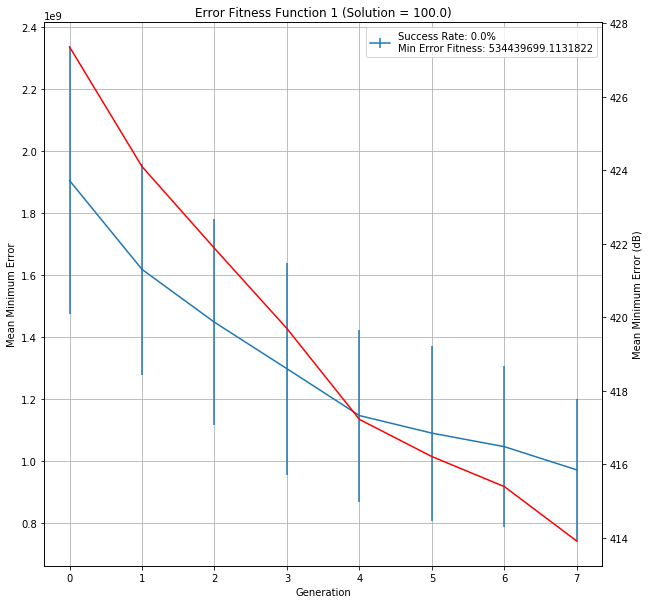

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[1_30_51_300_0.01_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,1,30,0.01,8.776777e+08,1.082670e+09,7.536667e+08,1.082198e+09,1.250083e+09,5.344397e+08,...,9.869759e+08,8.836830e+08,9.327437e+08,7.702216e+08,7.022950e+08,9.775968e+08,1.019829e+09,9.722557e+08,0:11:04,3000
